# Add specificity to Hannah's Feature Table

In [1]:
library(mashr)
library(dplyr)
library(tidyr)
library(vroom)
library(UpSetR)

Loading required package: ashr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
#Read in lfsr instead, faster

m <- readRDS('/nfs/lab/welison/islet_multiome/intermediates/caQTLs/231026_WE_caQTLs/anova_interaction/240111_WE_run1_all_ash_pca_canonical_mash.rds')
m

summary(m)

In [9]:
write.table(m$result$PosteriorMean, '/nfs/lab/welison/islet_multiome/intermediates/caQTLs/231026_WE_caQTLs/anova_interaction/240111_WE_run1_all_ash_pca_canonical_mash_PosteriorMean.tsv', 
                                  row.names=T, col.names=T, sep='\t', quote=F)
write.table(m$result$PosteriorSD, '/nfs/lab/welison/islet_multiome/intermediates/caQTLs/231026_WE_caQTLs/anova_interaction/240111_WE_run1_all_ash_pca_canonical_mash_PosteriorSD.tsv', 
                                  row.names=T, col.names=T, sep='\t', quote=F)

In [15]:
allF = vroom('/nfs/lab/welison/islet_multiome/intermediates/caQTLs/231026_WE_caQTLs/caQTLs_rasqual/Summary_allCells_all_run1F.tsv', delim='\t')

dim(allF)
head(allF)

Rows: 34898761 Columns: 34
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (7): Feature, rsID, Chromosome, Ref, Alt, cell, feature_snp
dbl (22): position, Af, HWEChi_square, IA, Log10_qval, Chi_square, Effect_si...
lgl  (5): flag_fdr10, flag_fdr05, flag_fdr01, exclude, qtl

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 34898761       34

Feature,rsID,Chromosome,position,Ref,Alt,Af,HWEChi_square,IA,Log10_qval,⋯,r2_rSNP,P_VAl,dist,flag_fdr10,flag_fdr05,flag_fdr01,cell,exclude,qtl,feature_snp
<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<chr>,<lgl>,<lgl>,<chr>
chr6:32622377-32623439,chr6:32620608:T:A,chr6,32620608,T,A,0.425926,2.231991,0.998678,-67.03611,⋯,0.824496,8.976233e-71,-2300,TRUE,TRUE,TRUE,acinar,FALSE,TRUE,chr6:32622377-32623439_chr6:32620608:T:A
chr6:32622377-32623439,chr6:32620292:C:T,chr6,32620292,C,T,0.481481,3.033058,0.997176,-67.03611,⋯,0.766739,3.415022e-70,-2616,TRUE,TRUE,TRUE,acinar,FALSE,TRUE,chr6:32622377-32623439_chr6:32620292:C:T
chr6:32622377-32623439,chr6:32620069:C:T,chr6,32620069,C,T,0.481481,3.033058,0.997249,-67.03611,⋯,0.766739,3.415022e-70,-2839,TRUE,TRUE,TRUE,acinar,FALSE,TRUE,chr6:32622377-32623439_chr6:32620069:C:T
chr6:32622377-32623439,chr6:32620254:G:A,chr6,32620254,G,A,0.481481,3.033058,0.997319,-67.03611,⋯,0.767647,3.459474e-70,-2654,TRUE,TRUE,TRUE,acinar,FALSE,TRUE,chr6:32622377-32623439_chr6:32620254:G:A
chr6:32622377-32623439,chr6:32623176:T:C,chr6,32623176,T,C,0.462963,1.913385,0.999952,-66.25852,⋯,0.777224,5.637594e-69,268,TRUE,TRUE,TRUE,acinar,FALSE,TRUE,chr6:32622377-32623439_chr6:32623176:T:C
chr6:32622377-32623439,chr6:32623122:G:T,chr6,32623122,G,T,0.462963,1.913385,0.999952,-66.25852,⋯,0.777217,5.650015e-69,214,TRUE,TRUE,TRUE,acinar,FALSE,TRUE,chr6:32622377-32623439_chr6:32623122:G:T


In [17]:
length(unique(allF$Feature))

[1] 252058

In [23]:
allF_wide <- select(allF, cre=Feature, cell, flag_fdr05) %>% 
    filter(cell %in% c('beta','alpha','acinar','bulk','delta','ductal','gamma')) %>%
    group_by(cell, cre) %>%
    summarise_all(any, na.rm = TRUE) %>%
    pivot_wider(names_from=cell,values_from=flag_fdr05, values_fill = FALSE)

dim(allF_wide)
head(allF_wide)

[1] 252058      8

cre,acinar,alpha,beta,bulk,delta,ductal,gamma
<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
chr10:100009188-100010635,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
chr10:100037925-100038813,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
chr10:100043372-100044999,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
chr10:100046018-100046622,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
chr10:100148232-100149295,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
chr10:100163428-100164654,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


In [24]:
sum(allF_wide$beta, na.rm=T)

[1] 5932

In [27]:
write.table(allF_wide, '/nfs/lab/welison/islet_multiome/intermediates/caQTLs/231026_WE_caQTLs/caQTLs_rasqual/Summary_by_ct_cre_caQTL_sig.tsv',
           sep='\t', col.names=T, row.names=F, quote=F)

In [3]:
all = vroom('/nfs/lab/welison/islet_multiome/intermediates/caQTLs/231026_WE_caQTLs/caQTLs_rasqual/Summary_allCells_all_run1F.tsv', delim='\t')

dim(all)
head(all)

Rows: 45566023 Columns: 35
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (7): Feature, rsID, Chromosome, Ref, Alt, cell, feature_snp
dbl (22): position, Af, HWEChi_square, IA, Log10_qval, Chi_square, Effect_si...
lgl  (6): flag_fdr10, flag_fdr05, flag_fdr01, is_ct_peak, exclude, qtl

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 45566023       35

Feature,rsID,Chromosome,position,Ref,Alt,Af,HWEChi_square,IA,Log10_qval,⋯,P_VAl,dist,flag_fdr10,flag_fdr05,flag_fdr01,cell,is_ct_peak,exclude,qtl,feature_snp
<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<chr>,<lgl>,<lgl>,<lgl>,<chr>
chr6:32622377-32623439,chr6:32620608:T:A,chr6,32620608,T,A,0.425926,2.231991,0.998678,-67.03611,⋯,8.976233e-71,-2300,TRUE,TRUE,TRUE,acinar,TRUE,FALSE,TRUE,chr6:32622377-32623439_chr6:32620608:T:A
chr6:32622377-32623439,chr6:32620292:C:T,chr6,32620292,C,T,0.481481,3.033058,0.997176,-67.03611,⋯,3.415022e-70,-2616,TRUE,TRUE,TRUE,acinar,TRUE,FALSE,TRUE,chr6:32622377-32623439_chr6:32620292:C:T
chr6:32622377-32623439,chr6:32620069:C:T,chr6,32620069,C,T,0.481481,3.033058,0.997249,-67.03611,⋯,3.415022e-70,-2839,TRUE,TRUE,TRUE,acinar,TRUE,FALSE,TRUE,chr6:32622377-32623439_chr6:32620069:C:T
chr6:32622377-32623439,chr6:32620254:G:A,chr6,32620254,G,A,0.481481,3.033058,0.997319,-67.03611,⋯,3.459474e-70,-2654,TRUE,TRUE,TRUE,acinar,TRUE,FALSE,TRUE,chr6:32622377-32623439_chr6:32620254:G:A
chr6:32622377-32623439,chr6:32623176:T:C,chr6,32623176,T,C,0.462963,1.913385,0.999952,-66.25852,⋯,5.637594e-69,268,TRUE,TRUE,TRUE,acinar,TRUE,FALSE,TRUE,chr6:32622377-32623439_chr6:32623176:T:C
chr6:32622377-32623439,chr6:32623122:G:T,chr6,32623122,G,T,0.462963,1.913385,0.999952,-66.25852,⋯,5.650015e-69,214,TRUE,TRUE,TRUE,acinar,TRUE,FALSE,TRUE,chr6:32622377-32623439_chr6:32623122:G:T


In [5]:
feature_annotations <- read.table('/nfs/lab/projects/multiomic_islet/outputs/genotypes/240521_caQTL_GWAS_coloc_cts/ct_specificity/all_caQTL_features_CT_specificity_info.txt', 
                                  header=T, sep='\t')

dim(feature_annotations)
head(feature_annotations)

[1] 9538   13

,cre,caqtl_num_cts,caqtl_cts,caqtl_ct_spec,peak_num_cts,peak_cts,peak_ct_spec,cpm6_num_cts,cpm6_cts,cpm6_ct_spec,cpm10_num_cts,cpm10_cts,cpm10_ct_spec
,<chr>,<int>,<chr>,<lgl>,<int>,<chr>,<lgl>,<int>,<chr>,<lgl>,<int>,<chr>,<lgl>
1,chr1:3139257-3140991,6,"beta, alpha, delta, gamma, acinar, ductal",FALSE,5,"beta, alpha, delta, gamma, ductal",FALSE,2,"delta, ductal",FALSE,NA,NA,NA
2,chr1:3141294-3141578,2,"beta, delta",FALSE,1,delta,TRUE,1,delta,TRUE,NA,NA,NA
3,chr1:3144228-3144677,3,"beta, alpha, acinar",FALSE,1,acinar,TRUE,NA,NA,NA,NA,NA,NA
4,chr1:3145672-3145886,1,beta,TRUE,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,chr1:3152654-3152854,1,beta,TRUE,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,chr1:3155063-3156322,3,"beta, alpha, delta",FALSE,3,"beta, alpha, delta",FALSE,1,delta,TRUE,NA,NA,NA


In [6]:
length(unique(all$Feature))

[1] 254797

In [7]:
all_wide <- select(all, cre=Feature, cell, flag_fdr05) %>% 
    filter(cell %in% c('beta','alpha','acinar','bulk','delta','ductal','gamma')) %>%
    group_by(cell, cre) %>%
    summarise_all(any, na.rm = TRUE) %>%
    pivot_wider(names_from=cell,values_from=flag_fdr05)

dim(all_wide)
head(all_wide)

[1] 254797      8

cre,acinar,alpha,beta,bulk,delta,ductal,gamma
<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
chr10:100006062-100006793,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE
chr10:100009188-100010635,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
chr10:100019905-100021214,FALSE,FALSE,FALSE,FALSE,FALSE,NA,FALSE
chr10:100037925-100038813,FALSE,FALSE,FALSE,FALSE,NA,NA,NA
chr10:100043372-100044999,FALSE,FALSE,FALSE,FALSE,NA,NA,FALSE
chr10:100046018-100046622,FALSE,FALSE,FALSE,FALSE,FALSE,NA,FALSE


In [14]:
sum(all_wide$gamma, na.rm=T)

[1] 528

In [ ]:
#mash <- data.frame(get_lfsr(m) < 0.05)
mash <- data.frame(read.table('/nfs/lab/welison/islet_multiome/intermediates/caQTLs/231026_WE_caQTLs/anova_interaction/240111_WE_run1_all_ash_pca_canonical_mash_lfsr.tsv', 
                                  header=T, sep='\t') < 0.05)
mash$cre <- stringr::str_split(rownames(mash), '::', simplify=T)[,1]

dim(mash)

mash <- group_by(mash, cre) %>%
    summarise_all(any)

dim(mash)
head(mash)

In [ ]:
length(feature_annotations$cre)
sum(feature_annotations$cre %in% all_wide$cre)
sum(feature_annotations$cre %in% mash$cre)

In [ ]:
all_wide_anno <- all_wide

all_wide_anno$sig_caqtls_cts <- c(NA)
all_wide_anno[(all_wide_anno$acinar == TRUE) & (!is.na(all_wide_anno$acinar)),]$sig_caqtls_cts <- paste0(all_wide_anno[(all_wide_anno$acinar == TRUE) & (!is.na(all_wide_anno$acinar)),]$sig_caqtls_cts, ', acinar')
all_wide_anno[(all_wide_anno$alpha == TRUE) & (!is.na(all_wide_anno$alpha)),]$sig_caqtls_cts <- paste0(all_wide_anno[(all_wide_anno$alpha == TRUE) & (!is.na(all_wide_anno$alpha)),]$sig_caqtls_cts, ', alpha')
all_wide_anno[(all_wide_anno$beta == TRUE) & (!is.na(all_wide_anno$beta)),]$sig_caqtls_cts <- paste0(all_wide_anno[(all_wide_anno$beta == TRUE) & (!is.na(all_wide_anno$beta)),]$sig_caqtls_cts, ', beta')
all_wide_anno[(all_wide_anno$bulk == TRUE) & (!is.na(all_wide_anno$bulk)),]$sig_caqtls_cts <- paste0(all_wide_anno[(all_wide_anno$bulk == TRUE) & (!is.na(all_wide_anno$bulk)),]$sig_caqtls_cts, ', bulk')
all_wide_anno[(all_wide_anno$delta == TRUE) & (!is.na(all_wide_anno$delta)),]$sig_caqtls_cts <- paste0(all_wide_anno[(all_wide_anno$delta == TRUE) & (!is.na(all_wide_anno$delta)),]$sig_caqtls_cts, ', delta')
all_wide_anno[(all_wide_anno$ductal == TRUE) & (!is.na(all_wide_anno$ductal)),]$sig_caqtls_cts <- paste0(all_wide_anno[(all_wide_anno$ductal == TRUE) & (!is.na(all_wide_anno$ductal)),]$sig_caqtls_cts, ', ductal')
all_wide_anno[(all_wide_anno$gamma == TRUE) & (!is.na(all_wide_anno$gamma)),]$sig_caqtls_cts <- paste0(all_wide_anno[(all_wide_anno$gamma == TRUE) & (!is.na(all_wide_anno$gamma)),]$sig_caqtls_cts, ', gamma')
all_wide_anno$sig_caqtls_cts <- stringr::str_remove(all_wide_anno$sig_caqtls_cts, ', ')
all_wide_anno$sig_caqtls_cts <- stringr::str_remove(all_wide_anno$sig_caqtls_cts, 'NA')

all_wide_anno$sig_caqtls_num_cts <- select(all_wide_anno, acinar, alpha, beta, bulk, delta, ductal, gamma) %>%
    rowSums(na.rm=T)
all_wide_anno[is.na(all_wide_anno$sig_caqtls_cts),]$sig_caqtls_num_cts <- NA
all_wide_anno$sig_caqtls_cts_spec <- all_wide_anno$sig_caqtls_num_cts == 1
all_wide_anno[is.na(all_wide_anno$sig_caqtls_cts),]$sig_caqtls_cts_spec <- NA

all_wide_anno <- select(all_wide_anno, cre, sig_caqtls_num_cts, sig_caqtls_cts, sig_caqtls_cts_spec)

dim(all_wide_anno)
head(all_wide_anno)

In [ ]:
mash_anno <- mash

mash_anno$mash_cts <- c(NA)
mash_anno[(mash_anno$acinar == TRUE) & (!is.na(mash_anno$acinar)),]$mash_cts <- paste0(mash_anno[(mash_anno$acinar == TRUE) & (!is.na(mash_anno$acinar)),]$mash_cts, ', acinar')
mash_anno[(mash_anno$alpha == TRUE) & (!is.na(mash_anno$alpha)),]$mash_cts <- paste0(mash_anno[(mash_anno$alpha == TRUE) & (!is.na(mash_anno$alpha)),]$mash_cts, ', alpha')
mash_anno[(mash_anno$beta == TRUE) & (!is.na(mash_anno$beta)),]$mash_cts <- paste0(mash_anno[(mash_anno$beta == TRUE) & (!is.na(mash_anno$beta)),]$mash_cts, ', beta')
mash_anno[(mash_anno$delta == TRUE) & (!is.na(mash_anno$delta)),]$mash_cts <- paste0(mash_anno[(mash_anno$delta == TRUE) & (!is.na(mash_anno$delta)),]$mash_cts, ', delta')
mash_anno[(mash_anno$ductal == TRUE) & (!is.na(mash_anno$ductal)),]$mash_cts <- paste0(mash_anno[(mash_anno$ductal == TRUE) & (!is.na(mash_anno$ductal)),]$mash_cts, ', ductal')
mash_anno[(mash_anno$gamma == TRUE) & (!is.na(mash_anno$gamma)),]$mash_cts <- paste0(mash_anno[(mash_anno$gamma == TRUE) & (!is.na(mash_anno$gamma)),]$mash_cts, ', gamma')
mash_anno$mash_cts <- stringr::str_remove(mash_anno$mash_cts, ', ')
mash_anno$mash_cts <- stringr::str_remove(mash_anno$mash_cts, 'NA')

mash_anno$mash_num_cts <- select(mash_anno, acinar, alpha, beta, delta, ductal, gamma) %>%
    rowSums(na.rm=T)
mash_anno[is.na(mash_anno$mash_cts),]$mash_num_cts <- NA
mash_anno$mash_cts_spec <- mash_anno$mash_num_cts == 1
mash_anno[is.na(mash_anno$mash_cts),]$mash_cts_spec <- NA

mash_anno <- select(mash_anno, cre, mash_num_cts, mash_cts, mash_cts_spec)

dim(mash_anno)
head(mash_anno)
unique(mash_anno$mash_cts)

In [ ]:
feature_anno_mash_sig <- left_join(all_wide_anno, mash_anno)

feature_annotations_fix <- left_join(feature_annotations, feature_anno_mash_sig)

dim(feature_anno_mash_sig)
head(feature_anno_mash_sig)

dim(feature_annotations_fix)
head(feature_annotations_fix)

In [ ]:
write.table(feature_anno_mash_sig, '/nfs/lab/projects/multiomic_islet/outputs/genotypes/240521_caQTL_GWAS_coloc_cts/all_caQTL_features_sigQTL_mash_specificity.txt', 
                                  row.names=F, col.names=T, sep='\t', quote=F)
write.table(feature_annotations_fix, '/nfs/lab/projects/multiomic_islet/outputs/genotypes/240521_caQTL_GWAS_coloc_cts/all_caQTL_features_CT_specificity_info_v2.txt', 
                                  row.names=F, col.names=T, sep='\t', quote=F)

In [ ]:
write.table(get_lfsr(m), '/nfs/lab/welison/islet_multiome/intermediates/caQTLs/231026_WE_caQTLs/anova_interaction/240111_WE_run1_all_ash_pca_canonical_mash_lfsr.tsv', 
                                  row.names=T, col.names=T, sep='\t', quote=F)

In [5]:
all = vroom('/nfs/lab/welison/islet_multiome/intermediates/caQTLs/231026_WE_caQTLs/caQTLs_rasqual/Summary_allCells_all_run1.tsv')

dim(all)
head(all)

Rows: 45566023 Columns: 35
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (7): Feature, rsID, Chromosome, Ref, Alt, cell, feature_snp
dbl (22): position, Af, HWEChi_square, IA, Log10_qval, Chi_square, Effect_si...
lgl  (6): flag_fdr10, flag_fdr05, flag_fdr01, is_ct_peak, exclude, qtl

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 45566023       35

Feature,rsID,Chromosome,position,Ref,Alt,Af,HWEChi_square,IA,Log10_qval,⋯,P_VAl,dist,flag_fdr10,flag_fdr05,flag_fdr01,cell,is_ct_peak,exclude,qtl,feature_snp
<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<chr>,<lgl>,<lgl>,<lgl>,<chr>
chr6:32622377-32623439,chr6:32620608:T:A,chr6,32620608,T,A,0.425926,2.231991,0.998678,-67.03611,⋯,8.976233e-71,-2300,TRUE,TRUE,TRUE,acinar,TRUE,FALSE,TRUE,chr6:32622377-32623439_chr6:32620608:T:A
chr6:32622377-32623439,chr6:32620292:C:T,chr6,32620292,C,T,0.481481,3.033058,0.997176,-67.03611,⋯,3.415022e-70,-2616,TRUE,TRUE,TRUE,acinar,TRUE,FALSE,TRUE,chr6:32622377-32623439_chr6:32620292:C:T
chr6:32622377-32623439,chr6:32620069:C:T,chr6,32620069,C,T,0.481481,3.033058,0.997249,-67.03611,⋯,3.415022e-70,-2839,TRUE,TRUE,TRUE,acinar,TRUE,FALSE,TRUE,chr6:32622377-32623439_chr6:32620069:C:T
chr6:32622377-32623439,chr6:32620254:G:A,chr6,32620254,G,A,0.481481,3.033058,0.997319,-67.03611,⋯,3.459474e-70,-2654,TRUE,TRUE,TRUE,acinar,TRUE,FALSE,TRUE,chr6:32622377-32623439_chr6:32620254:G:A
chr6:32622377-32623439,chr6:32623176:T:C,chr6,32623176,T,C,0.462963,1.913385,0.999952,-66.25852,⋯,5.637594e-69,268,TRUE,TRUE,TRUE,acinar,TRUE,FALSE,TRUE,chr6:32622377-32623439_chr6:32623176:T:C
chr6:32622377-32623439,chr6:32623122:G:T,chr6,32623122,G,T,0.462963,1.913385,0.999952,-66.25852,⋯,5.650015e-69,214,TRUE,TRUE,TRUE,acinar,TRUE,FALSE,TRUE,chr6:32622377-32623439_chr6:32623122:G:T


In [6]:
mash <- data.frame(read.table('/nfs/lab/welison/islet_multiome/intermediates/caQTLs/231026_WE_caQTLs/anova_interaction/240111_WE_run1_all_ash_pca_canonical_mash_lfsr.tsv', 
                                  header=T, sep='\t') < 0.05)

dim(mash)
head(mash)

[1] 10667262        6

,acinar,alpha,beta,delta,ductal,gamma
,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
chr6:32622377-32623439::chr6:32620608:T:A,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
chr6:32622377-32623439::chr6:32620292:C:T,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
chr6:32622377-32623439::chr6:32620069:C:T,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
chr6:32622377-32623439::chr6:32620254:G:A,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
chr6:32622377-32623439::chr6:32623176:T:C,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
chr6:32622377-32623439::chr6:32623122:G:T,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE


In [7]:
spec <- read.table('/nfs/lab/projects/multiomic_islet/outputs/genotypes/240521_caQTL_GWAS_coloc_cts/ct_specificity/all_RASQUAL_caQTL_features_ct_specificity_FIN.txt',
                   header=T, sep='\t')

dim(spec)
head(spec)

[1] 254797     16

,cre,sig_caqtls_num_cts,sig_caqtls_cts,sig_caqtls_cts_spec,mash_num_cts,mash_cts,mash_cts_spec,peak_num_cts,peak_cts,peak_ct_spec,cpm6_num_cts,cpm6_cts,cpm6_ct_spec,cpm10_num_cts,cpm10_cts,cpm10_ct_spec
,<chr>,<int>,<chr>,<lgl>,<int>,<chr>,<lgl>,<int>,<chr>,<lgl>,<int>,<chr>,<lgl>,<int>,<chr>,<lgl>
1,chr10:100006062-100006793,2,"beta, bulk",FALSE,NA,NA,NA,4,"alpha, delta, gamma, ductal",FALSE,2,"gamma, ductal",FALSE,NA,NA,NA
2,chr10:100009188-100010635,NA,NA,NA,NA,NA,NA,6,"beta, alpha, delta, gamma, acinar, ductal",FALSE,6,"beta, alpha, delta, gamma, acinar, ductal",FALSE,6,"beta, alpha, delta, gamma, acinar, ductal",FALSE
3,chr10:100019905-100021214,NA,NA,NA,NA,NA,NA,3,"alpha, delta, gamma",FALSE,NA,NA,NA,NA,NA,NA
4,chr10:100037925-100038813,NA,NA,NA,NA,NA,NA,3,"alpha, acinar, ductal",FALSE,NA,NA,NA,NA,NA,NA
5,chr10:100043372-100044999,NA,NA,NA,NA,NA,NA,3,"gamma, acinar, ductal",FALSE,NA,NA,NA,NA,NA,NA
6,chr10:100046018-100046622,NA,NA,NA,NA,NA,NA,6,"beta, alpha, delta, gamma, acinar, ductal",FALSE,NA,NA,NA,NA,NA,NA


In [8]:
length(unique(dplyr::filter(all, flag_fdr05)$Feature))

[1] 14960

In [9]:
length(unique(dplyr::filter(all, flag_fdr05 & cell != 'bulk')$Feature))

[1] 10833

In [ ]:
bool_lfsr <- mash
bool_lfsr$Peak <- stringr::str_split(rownames(bool_lfsr), "::", simplify=T)[,1]

upset_data <- group_by(bool_lfsr, Peak) %>%
    summarise_all(any) %>%
    tibble::column_to_rownames(var='Peak') %>%
    mutate_all(as.numeric)

head(upset_data)
upset(upset_data, nsets=6, order.by = "freq")

In [ ]:
upset(upset_data, nsets=6, order.by = "freq", nintersects=10, mainbar.y.label="# caQTL Peaks", 
      sets.x.label="# of caQTL Peaks", text.scale=2)


In [ ]:
options(repr.plot.width=11, repr.plot.height=6)
p1 <- upset(upset_data, nsets=6, order.by = "freq", nintersects=10, mainbar.y.label="Number of caQTL Peaks", 
      sets.x.label="Num. of caQTL Peaks", text.scale=2)

p1

In [23]:
nrow(upset_data[rowSums(upset_data) > 0,])

[1] 7412    6

In [26]:
sum(rowSums(upset_data[rowSums(upset_data) > 0,]) > 1)

[1] 6878

In [28]:
sum(rowSums(upset_data[rowSums(upset_data) > 0,]) == 6) * 100 / nrow(upset_data[rowSums(upset_data) > 0,])
sum(rowSums(upset_data[rowSums(upset_data) > 0,]) > 1) * 100 / nrow(upset_data[rowSums(upset_data) > 0,])

[1] 61.31948

[1] 92.79547

In [ ]:
all$sig_effect <- NA
all[all$qtl,]$sig_effect <- all[all$qtl,]$Effect_size

head(all)

In [37]:
sig_effects_wide <- select(all, Feature, rsID, sig_effect, cell) %>%
    filter(cell %in% c('acinar','alpha','beta','delta','gamma','ductal')) %>%
    pivot_wider(names_from = cell, values_from=sig_effect)

dim(sig_effects_wide)
head(sig_effects_wide)

[1] 10667262        8

Feature,rsID,acinar,alpha,beta,delta,ductal,gamma
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr6:32622377-32623439,chr6:32620608:T:A,0.891920,0.766910,0.747362,NA,NA,NA
chr6:32622377-32623439,chr6:32620292:C:T,0.892051,0.763815,0.744102,NA,NA,NA
chr6:32622377-32623439,chr6:32620069:C:T,0.892051,0.763815,0.744102,NA,NA,NA
chr6:32622377-32623439,chr6:32620254:G:A,0.892031,0.763815,0.744097,NA,NA,NA
chr6:32622377-32623439,chr6:32623176:T:C,0.893393,0.742162,0.739113,NA,NA,NA
chr6:32622377-32623439,chr6:32623122:G:T,0.893389,0.729961,0.735243,NA,NA,NA


[1] 11650739

In [43]:
?any

In [50]:
sig_effects_wide_mutate <- mutate(sig_effects_wide, 
       any_up   = acinar > 0.5 | alpha > 0.5 | beta > 0.5 | delta > 0.5 | gamma > 0.5 | ductal > 0.5,
       any_down = acinar < 0.5 | alpha < 0.5 | beta < 0.5 | delta < 0.5 | gamma < 0.5 | ductal < 0.5,
       opposing = any_up & any_down)

dim(sig_effects_wide_mutate)
head(sig_effects_wide_mutate)
sum(sig_effects_wide_mutate$opposing, na.rm=T)

[1] 10667262       11

Feature,rsID,acinar,alpha,beta,delta,ductal,gamma,any_up,any_down,opposing
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>
chr6:32622377-32623439,chr6:32620608:T:A,0.891920,0.766910,0.747362,NA,NA,NA,TRUE,NA,NA
chr6:32622377-32623439,chr6:32620292:C:T,0.892051,0.763815,0.744102,NA,NA,NA,TRUE,NA,NA
chr6:32622377-32623439,chr6:32620069:C:T,0.892051,0.763815,0.744102,NA,NA,NA,TRUE,NA,NA
chr6:32622377-32623439,chr6:32620254:G:A,0.892031,0.763815,0.744097,NA,NA,NA,TRUE,NA,NA
chr6:32622377-32623439,chr6:32623176:T:C,0.893393,0.742162,0.739113,NA,NA,NA,TRUE,NA,NA
chr6:32622377-32623439,chr6:32623122:G:T,0.893389,0.729961,0.735243,NA,NA,NA,TRUE,NA,NA


[1] 1662

In [52]:
sig_effects_wide_opposing <- filter(sig_effects_wide_mutate, opposing)

dim(sig_effects_wide_opposing)
head(sig_effects_wide_opposing)
length(unique(sig_effects_wide_opposing$Feature))

[1] 1662   11

Feature,rsID,acinar,alpha,beta,delta,ductal,gamma,any_up,any_down,opposing
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>
chr6:32622377-32623439,chr6:32625850:G:A,0.889509,0.270358,0.743465,NA,NA,NA,TRUE,TRUE,TRUE
chr6:32622377-32623439,chr6:32619458:C:T,0.122557,0.754524,NA,NA,NA,NA,TRUE,TRUE,TRUE
chr6:32622377-32623439,chr6:32619218:C:T,0.154995,0.259386,0.737914,NA,NA,NA,TRUE,TRUE,TRUE
chr6:32622377-32623439,chr6:32619215:G:T,0.154995,0.259386,0.737914,NA,NA,NA,TRUE,TRUE,TRUE
chr6:32622377-32623439,chr6:32615965:G:A,0.159731,0.257125,0.726948,NA,NA,NA,TRUE,TRUE,TRUE
chr6:32622377-32623439,chr6:32619010:A:G,0.138192,0.251616,0.743434,NA,NA,NA,TRUE,TRUE,TRUE


[1] 86

In [ ]:
upset_data[unique(sig_effects_wide_opposing$Feature),]

In [59]:
length(unique(sig_effects_wide_opposing$Feature)) * 100 / nrow(upset_data[rowSums(upset_data) > 0,])

[1] 1.160281

In [76]:
sig <- filter(all, flag_fdr05) %>%
       filter(cell %in% c('acinar','alpha','beta','delta','ductal','gamma'))

dim(sig)
head(sig)

[1] 434607     36

Feature,rsID,Chromosome,position,Ref,Alt,Af,HWEChi_square,IA,Log10_qval,⋯,dist,flag_fdr10,flag_fdr05,flag_fdr01,cell,is_ct_peak,exclude,qtl,feature_snp,sig_effect
<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<lgl>,<lgl>,<lgl>,<chr>,<lgl>,<lgl>,<lgl>,<chr>,<dbl>
chr6:32622377-32623439,chr6:32620608:T:A,chr6,32620608,T,A,0.425926,2.231991,0.998678,-67.03611,⋯,-2300,TRUE,TRUE,TRUE,acinar,TRUE,FALSE,TRUE,chr6:32622377-32623439_chr6:32620608:T:A,0.891920
chr6:32622377-32623439,chr6:32620292:C:T,chr6,32620292,C,T,0.481481,3.033058,0.997176,-67.03611,⋯,-2616,TRUE,TRUE,TRUE,acinar,TRUE,FALSE,TRUE,chr6:32622377-32623439_chr6:32620292:C:T,0.892051
chr6:32622377-32623439,chr6:32620069:C:T,chr6,32620069,C,T,0.481481,3.033058,0.997249,-67.03611,⋯,-2839,TRUE,TRUE,TRUE,acinar,TRUE,FALSE,TRUE,chr6:32622377-32623439_chr6:32620069:C:T,0.892051
chr6:32622377-32623439,chr6:32620254:G:A,chr6,32620254,G,A,0.481481,3.033058,0.997319,-67.03611,⋯,-2654,TRUE,TRUE,TRUE,acinar,TRUE,FALSE,TRUE,chr6:32622377-32623439_chr6:32620254:G:A,0.892031
chr6:32622377-32623439,chr6:32623176:T:C,chr6,32623176,T,C,0.462963,1.913385,0.999952,-66.25852,⋯,268,TRUE,TRUE,TRUE,acinar,TRUE,FALSE,TRUE,chr6:32622377-32623439_chr6:32623176:T:C,0.893393
chr6:32622377-32623439,chr6:32623122:G:T,chr6,32623122,G,T,0.462963,1.913385,0.999952,-66.25852,⋯,214,TRUE,TRUE,TRUE,acinar,TRUE,FALSE,TRUE,chr6:32622377-32623439_chr6:32623122:G:T,0.893389


In [63]:
library(stringr)

In [77]:
sig$start <- str_split(str_split(sig$Feature, ":", simplify=T)[,2], "-", simplify=T)[,1]
sig$end <- str_split(str_split(sig$Feature, ":", simplify=T)[,2], "-", simplify=T)[,2]
sig$is_in_peak <- (sig$start < sig$position) & (sig$end > sig$position)

dim(sig)
head(sig)

[1] 434607     39

Feature,rsID,Chromosome,position,Ref,Alt,Af,HWEChi_square,IA,Log10_qval,⋯,flag_fdr01,cell,is_ct_peak,exclude,qtl,feature_snp,sig_effect,start,end,is_in_peak
<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<lgl>,<chr>,<lgl>,<lgl>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<lgl>
chr6:32622377-32623439,chr6:32620608:T:A,chr6,32620608,T,A,0.425926,2.231991,0.998678,-67.03611,⋯,TRUE,acinar,TRUE,FALSE,TRUE,chr6:32622377-32623439_chr6:32620608:T:A,0.891920,32622377,32623439,FALSE
chr6:32622377-32623439,chr6:32620292:C:T,chr6,32620292,C,T,0.481481,3.033058,0.997176,-67.03611,⋯,TRUE,acinar,TRUE,FALSE,TRUE,chr6:32622377-32623439_chr6:32620292:C:T,0.892051,32622377,32623439,FALSE
chr6:32622377-32623439,chr6:32620069:C:T,chr6,32620069,C,T,0.481481,3.033058,0.997249,-67.03611,⋯,TRUE,acinar,TRUE,FALSE,TRUE,chr6:32622377-32623439_chr6:32620069:C:T,0.892051,32622377,32623439,FALSE
chr6:32622377-32623439,chr6:32620254:G:A,chr6,32620254,G,A,0.481481,3.033058,0.997319,-67.03611,⋯,TRUE,acinar,TRUE,FALSE,TRUE,chr6:32622377-32623439_chr6:32620254:G:A,0.892031,32622377,32623439,FALSE
chr6:32622377-32623439,chr6:32623176:T:C,chr6,32623176,T,C,0.462963,1.913385,0.999952,-66.25852,⋯,TRUE,acinar,TRUE,FALSE,TRUE,chr6:32622377-32623439_chr6:32623176:T:C,0.893393,32622377,32623439,TRUE
chr6:32622377-32623439,chr6:32623122:G:T,chr6,32623122,G,T,0.462963,1.913385,0.999952,-66.25852,⋯,TRUE,acinar,TRUE,FALSE,TRUE,chr6:32622377-32623439_chr6:32623122:G:T,0.893389,32622377,32623439,TRUE


In [78]:
table(sig$is_in_peak)
table(sig$is_in_peak)[2] * 100 / nrow(sig)


 FALSE   TRUE 
392424  42183 

TRUE 
9.70601

In [124]:
any_in <- group_by(sig, Feature) %>%
    summarise(is_in_peak=any(is_in_peak))

dim(any_in)
head(any_in)
sum(any_in$is_in_peak)

sum(any_in$is_in_peak) * 100 / nrow(any_in)

[1] 10832     2

Feature,is_in_peak
<chr>,<lgl>
chr10:100006062-100006793,TRUE
chr10:100101427-100102098,TRUE
chr10:100346335-100347694,FALSE
chr10:100561831-100563289,TRUE
chr10:100655787-100656966,FALSE
chr10:101118690-101118974,TRUE


[1] 9179

[1] 84.73966

In [123]:
any_in <- group_by(sig, Feature, cell) %>%
    summarise(is_in_peak=any(is_in_peak)) %>%
    pivot_wider(values_from = is_in_peak, names_from = cell)

dim(any_in)
head(any_in)

count_ct <- ungroup(any_in) %>%
    select(-Feature) %>%
    summarise_all(base::sum, na.rm=T)

sum_ct <- nrow(any_in) - ungroup(any_in) %>%
    select(-Feature) %>%
    is.na() %>%
    data.frame() %>%
    summarise_all(base::sum, na.rm=T)

count_ct
sum_ct

count_ct * 100 / sum_ct

`summarise()` has grouped output by 'Feature'. You can override using the `.groups` argument.


[1] 10832     7

Feature,beta,alpha,gamma,acinar,ductal,delta
<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
chr10:100006062-100006793,TRUE,NA,NA,NA,NA,NA
chr10:100101427-100102098,NA,TRUE,NA,NA,NA,NA
chr10:100346335-100347694,FALSE,NA,NA,NA,NA,NA
chr10:100561831-100563289,TRUE,NA,TRUE,NA,NA,NA
chr10:100655787-100656966,NA,NA,NA,FALSE,NA,NA
chr10:101118690-101118974,NA,NA,NA,TRUE,NA,NA


beta,alpha,gamma,acinar,ductal,delta
<int>,<int>,<int>,<int>,<int>,<int>
6161,4228,456,1940,238,762


beta,alpha,gamma,acinar,ductal,delta
<int>,<int>,<int>,<int>,<int>,<int>
7205,4954,528,2225,268,882


beta,alpha,gamma,acinar,ductal,delta
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
85.51006,85.34518,86.36364,87.19101,88.80597,86.39456


In [61]:
leads = vroom('/nfs/lab/welison/islet_multiome/intermediates/caQTLs/231026_WE_caQTLs/caQTLs_rasqual/Summary_allCells_leads_run1F.tsv')

dim(leads)
head(leads)

Rows: 773267 Columns: 34
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (7): Feature, rsID, Chromosome, Ref, Alt, cell, feature_snp
dbl (22): position, Af, HWEChi_square, IA, Log10_qval, Chi_square, Effect_si...
lgl  (5): flag_fdr10, flag_fdr05, flag_fdr01, exclude, qtl

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 773267     34

Feature,rsID,Chromosome,position,Ref,Alt,Af,HWEChi_square,IA,Log10_qval,⋯,r2_rSNP,P_VAl,dist,flag_fdr10,flag_fdr05,flag_fdr01,cell,exclude,qtl,feature_snp
<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<chr>,<lgl>,<lgl>,<chr>
chr6:32622377-32623439,chr6:32620608:T:A,chr6,32620608,T,A,0.425926,2.231991,0.998678,-67.03611,⋯,0.824496,8.976233e-71,-2300,TRUE,TRUE,TRUE,acinar,FALSE,TRUE,chr6:32622377-32623439_chr6:32620608:T:A
chr9:6931452-6932441,chr9:6929401:T:A,chr9,6929401,T,A,0.333333,0.750000,0.993936,-36.60879,⋯,0.985795,1.925609e-38,-2545,TRUE,TRUE,TRUE,acinar,FALSE,TRUE,chr9:6931452-6932441_chr9:6929401:T:A
chr4:7164816-7165698,chr4:7160692:T:C,chr4,7160692,T,C,0.277778,0.006391,0.999935,-32.46831,⋯,0.902371,1.502522e-34,-4565,TRUE,TRUE,TRUE,acinar,FALSE,TRUE,chr4:7164816-7165698_chr4:7160692:T:C
chr9:93230239-93231938,chr9:93231475:G:A,chr9,93231475,G,A,0.222222,0.137755,0.999392,-30.83427,⋯,0.992117,3.105136e-32,387,TRUE,TRUE,TRUE,acinar,FALSE,TRUE,chr9:93230239-93231938_chr9:93231475:G:A
chr17:76968760-76970675,chr17:76972946:C:A,chr17,76972946,C,A,0.296296,0.337734,0.980182,-29.73370,⋯,0.940828,4.969777e-32,3228,TRUE,TRUE,TRUE,acinar,FALSE,TRUE,chr17:76968760-76970675_chr17:76972946:C:A
chr21:13979625-13980808,chr21:13980560:G:C,chr21,13980560,G,C,0.314815,0.083599,0.930667,-27.70426,⋯,0.870565,7.793799e-30,344,TRUE,TRUE,TRUE,acinar,FALSE,TRUE,chr21:13979625-13980808_chr21:13980560:G:C


In [125]:
sig_leads <- filter(leads, flag_fdr05) %>%
       filter(cell %in% c('acinar','alpha','beta','delta','ductal','gamma'))

dim(sig_leads)
head(sig_leads)

[1] 13962    34

Feature,rsID,Chromosome,position,Ref,Alt,Af,HWEChi_square,IA,Log10_qval,⋯,r2_rSNP,P_VAl,dist,flag_fdr10,flag_fdr05,flag_fdr01,cell,exclude,qtl,feature_snp
<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<chr>,<lgl>,<lgl>,<chr>
chr6:32622377-32623439,chr6:32620608:T:A,chr6,32620608,T,A,0.425926,2.231991,0.998678,-67.03611,⋯,0.824496,8.976233e-71,-2300,TRUE,TRUE,TRUE,acinar,FALSE,TRUE,chr6:32622377-32623439_chr6:32620608:T:A
chr9:6931452-6932441,chr9:6929401:T:A,chr9,6929401,T,A,0.333333,0.750000,0.993936,-36.60879,⋯,0.985795,1.925609e-38,-2545,TRUE,TRUE,TRUE,acinar,FALSE,TRUE,chr9:6931452-6932441_chr9:6929401:T:A
chr4:7164816-7165698,chr4:7160692:T:C,chr4,7160692,T,C,0.277778,0.006391,0.999935,-32.46831,⋯,0.902371,1.502522e-34,-4565,TRUE,TRUE,TRUE,acinar,FALSE,TRUE,chr4:7164816-7165698_chr4:7160692:T:C
chr9:93230239-93231938,chr9:93231475:G:A,chr9,93231475,G,A,0.222222,0.137755,0.999392,-30.83427,⋯,0.992117,3.105136e-32,387,TRUE,TRUE,TRUE,acinar,FALSE,TRUE,chr9:93230239-93231938_chr9:93231475:G:A
chr17:76968760-76970675,chr17:76972946:C:A,chr17,76972946,C,A,0.296296,0.337734,0.980182,-29.73370,⋯,0.940828,4.969777e-32,3228,TRUE,TRUE,TRUE,acinar,FALSE,TRUE,chr17:76968760-76970675_chr17:76972946:C:A
chr21:13979625-13980808,chr21:13980560:G:C,chr21,13980560,G,C,0.314815,0.083599,0.930667,-27.70426,⋯,0.870565,7.793799e-30,344,TRUE,TRUE,TRUE,acinar,FALSE,TRUE,chr21:13979625-13980808_chr21:13980560:G:C


In [126]:
sig_leads$start <- str_split(str_split(sig_leads$Feature, ":", simplify=T)[,2], "-", simplify=T)[,1]
sig_leads$end <- str_split(str_split(sig_leads$Feature, ":", simplify=T)[,2], "-", simplify=T)[,2]
sig_leads$is_in_peak <- (sig_leads$start < sig_leads$position) & (sig_leads$end > sig_leads$position)

dim(sig_leads)
head(sig_leads)

[1] 13962    37

Feature,rsID,Chromosome,position,Ref,Alt,Af,HWEChi_square,IA,Log10_qval,⋯,flag_fdr10,flag_fdr05,flag_fdr01,cell,exclude,qtl,feature_snp,start,end,is_in_peak
<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<lgl>,<lgl>,<lgl>,<chr>,<lgl>,<lgl>,<chr>,<chr>,<chr>,<lgl>
chr6:32622377-32623439,chr6:32620608:T:A,chr6,32620608,T,A,0.425926,2.231991,0.998678,-67.03611,⋯,TRUE,TRUE,TRUE,acinar,FALSE,TRUE,chr6:32622377-32623439_chr6:32620608:T:A,32622377,32623439,FALSE
chr9:6931452-6932441,chr9:6929401:T:A,chr9,6929401,T,A,0.333333,0.750000,0.993936,-36.60879,⋯,TRUE,TRUE,TRUE,acinar,FALSE,TRUE,chr9:6931452-6932441_chr9:6929401:T:A,6931452,6932441,FALSE
chr4:7164816-7165698,chr4:7160692:T:C,chr4,7160692,T,C,0.277778,0.006391,0.999935,-32.46831,⋯,TRUE,TRUE,TRUE,acinar,FALSE,TRUE,chr4:7164816-7165698_chr4:7160692:T:C,7164816,7165698,FALSE
chr9:93230239-93231938,chr9:93231475:G:A,chr9,93231475,G,A,0.222222,0.137755,0.999392,-30.83427,⋯,TRUE,TRUE,TRUE,acinar,FALSE,TRUE,chr9:93230239-93231938_chr9:93231475:G:A,93230239,93231938,TRUE
chr17:76968760-76970675,chr17:76972946:C:A,chr17,76972946,C,A,0.296296,0.337734,0.980182,-29.73370,⋯,TRUE,TRUE,TRUE,acinar,FALSE,TRUE,chr17:76968760-76970675_chr17:76972946:C:A,76968760,76970675,FALSE
chr21:13979625-13980808,chr21:13980560:G:C,chr21,13980560,G,C,0.314815,0.083599,0.930667,-27.70426,⋯,TRUE,TRUE,TRUE,acinar,FALSE,TRUE,chr21:13979625-13980808_chr21:13980560:G:C,13979625,13980808,TRUE


In [128]:
table(sig_leads$is_in_peak)
table(sig_leads$is_in_peak)[2] * 100 / nrow(sig_leads)


FALSE  TRUE 
 8116  5846 

TRUE 
41.87079

In [129]:
any_in_leads <- group_by(sig_leads, Feature) %>%
    summarise(is_in_peak=any(is_in_peak))

dim(any_in_leads)
head(any_in_leads)
sum(any_in_leads$is_in_peak)

sum(any_in_leads$is_in_peak) * 100 / nrow(any_in_leads)

[1] 9567    2

Feature,is_in_peak
<chr>,<lgl>
chr10:100101427-100102098,FALSE
chr10:100346335-100347694,FALSE
chr10:100561831-100563289,TRUE
chr10:100655787-100656966,FALSE
chr10:101118690-101118974,FALSE
chr10:101330473-101331645,FALSE


[1] 4504

[1] 47.0785

In [131]:
any_in_leads <- group_by(sig_leads, Feature, cell) %>%
    summarise(is_in_peak=any(is_in_peak)) %>%
    pivot_wider(values_from = is_in_peak, names_from = cell)

dim(any_in_leads)
head(any_in_leads)

count_ct <- ungroup(any_in_leads) %>%
    select(-Feature) %>%
    summarise_all(base::sum, na.rm=T)

sum_ct <- nrow(any_in_leads) - ungroup(any_in_leads) %>%
    select(-Feature) %>%
    is.na() %>%
    data.frame() %>%
    summarise_all(base::sum, na.rm=T)

count_ct
sum_ct

count_ct * 100 / sum_ct

`summarise()` has grouped output by 'Feature'. You can override using the `.groups` argument.


[1] 9567    7

Feature,alpha,beta,gamma,acinar,ductal,delta
<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
chr10:100101427-100102098,FALSE,NA,NA,NA,NA,NA
chr10:100346335-100347694,NA,FALSE,NA,NA,NA,NA
chr10:100561831-100563289,NA,TRUE,FALSE,NA,NA,NA
chr10:100655787-100656966,NA,NA,NA,FALSE,NA,NA
chr10:101118690-101118974,NA,NA,NA,FALSE,NA,NA
chr10:101330473-101331645,FALSE,NA,NA,NA,NA,NA


alpha,beta,gamma,acinar,ductal,delta
<int>,<int>,<int>,<int>,<int>,<int>
1750,2562,210,877,98,349


alpha,beta,gamma,acinar,ductal,delta
<int>,<int>,<int>,<int>,<int>,<int>
4218,5932,524,2144,267,877


alpha,beta,gamma,acinar,ductal,delta
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
41.48886,43.18948,40.07634,40.90485,36.70412,39.79475


In [139]:
colnames(all)

[1] "Feature"                       "rsID"                         
 [3] "Chromosome"                    "position"                     
 [5] "Ref"                           "Alt"                          
 [7] "Af"                            "HWEChi_square"                
 [9] "IA"                            "Log10_qval"                   
[11] "Chi_square"                    "Effect_size"                  
[13] "Sequencing_mapping_error_rate" "Ref_allele_bias"              
[15] "Overdispersion"                "SNPid_within_region"          
[17] "No_fSNPs"                      "No_tested_SNPs"               
[19] "No_iterations_for_H0"          "No_iterations_for_H1"         
[21] "ties"                          "Log_likelihood_H0"            
[23] "Convergence_status"            "r2_fSNPs"                     
[25] "r2_rSNP"                       "P_VAl"                        
[27] "dist"                          "flag_fdr10"                   
[29] "flag_fdr05"                    "flag_fdr01"                   
[31] "cell"                          "is_ct_peak"                   
[33] "exclude"                       "qtl"                          
[35] "feature_snp"                   "sig_effect"

In [141]:
filter(all, cell == 'acinar' & rsID=='chr15:70140778:G:C') %>%
    select(Feature, rsID, Effect_size, Log10_qval, flag_fdr05, P_VAl)
filter(all, cell == 'alpha' & rsID=='chr15:70140778:G:C') %>%
    select(Feature, rsID, Effect_size, Log10_qval, flag_fdr05, P_VAl)

Feature,rsID,Effect_size,Log10_qval,flag_fdr05,P_VAl
<chr>,<chr>,<dbl>,<dbl>,<lgl>,<dbl>
chr15:70140098-70143608,chr15:70140778:G:C,0.296461,-12.0154156,TRUE,6.251057e-14
chr15:70133274-70133960,chr15:70140778:G:C,0.453546,-0.2202083,FALSE,3.589647e-01


Feature,rsID,Effect_size,Log10_qval,flag_fdr05,P_VAl
<chr>,<chr>,<dbl>,<dbl>,<lgl>,<dbl>
chr15:70140098-70143608,chr15:70140778:G:C,0.631639,-11.71472774,TRUE,1.258652e-13
chr15:70132038-70132506,chr15:70140778:G:C,0.519880,-0.02446078,FALSE,5.472976e-01
chr15:70133274-70133960,chr15:70140778:G:C,0.493290,-0.01853737,FALSE,8.286017e-01


In [146]:
10^-11.71472774

[1] 1.928734e-12

In [148]:
filter(all, cell == 'bulk' & rsID=='chr15:70140778:G:C') %>%
    select(Feature, rsID, Effect_size, Log10_qval, flag_fdr05, flag_fdr10, P_VAl)

Feature,rsID,Effect_size,Log10_qval,flag_fdr05,flag_fdr10,P_VAl
<chr>,<chr>,<dbl>,<dbl>,<lgl>,<lgl>,<dbl>
chr15:70140098-70143608,chr15:70140778:G:C,0.538147,-1.33008624,FALSE,FALSE,0.00328170
chr15:70133274-70133960,chr15:70140778:G:C,0.533516,-0.05821433,FALSE,FALSE,0.08290024
chr15:70132038-70132506,chr15:70140778:G:C,0.505957,-0.04383447,FALSE,FALSE,0.75655449


In [ ]:
beta_only_mash <- mash[mash$beta & (rowSums(mash) == 1),]
beta_only_mash

In [ ]:
beta_leads <- filter(leads, cell=='beta')
beta_only_mash_leads <- beta_only_mash[rownames(beta_only_mash) %in% paste0(beta_leads$Feature, "::", beta_leads$rsID),]

dim(beta_only_mash_leads)
head(beta_only_mash_leads)

In [ ]:
dim(sig_effects_wide)

In [ ]:
effects_wide <- select(all, Feature, rsID, Effect_size, cell) %>%
    filter(cell %in% c('acinar','alpha','beta','delta','gamma','ductal')) %>%
    pivot_wider(names_from = cell, values_from=Effect_size)

dim(effects_wide)
head(effects_wide)

In [ ]:
beta_mash_effects <- filter(effects_wide, Feature %in% str_split(rownames(beta_only_mash_leads), "::", simplify=T)[,1]) %>%
    filter(rsID %in% str_split(rownames(beta_only_mash_leads), "::", simplify=T)[,2]) %>%
    arrange(beta)

dim(beta_mash_effects)
head(beta_mash_effects, n=20)
tail(beta_mash_effects, n=20)

In [ ]:
head(beta_mash_effects, n=30)
tail(beta_mash_effects, n=30)

In [ ]:
beta_mash_sig_effects <- filter(sig_effects_wide, Feature %in% str_split(rownames(beta_only_mash_leads), "::", simplify=T)[,1]) %>%
    filter(rsID %in% str_split(rownames(beta_only_mash_leads), "::", simplify=T)[,2]) %>%
    arrange(beta)

dim(beta_mash_sig_effects)
head(beta_mash_sig_effects, n=20)
tail(beta_mash_sig_effects, n=20)

In [ ]:
mutate(rowwise(beta_mash_effects), other_avg= mean(c(alpha,acinar,ductal,gamma,delta),
                                       na.rm=T)) %>%
    filter(other_avg < 0.52) %>%
    filter(other_avg > 0.48)

In [199]:
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,29089331,1553.6,81444724,4349.7,81444724,4349.7
Vcells,2043044514,15587.2,3994409819,30475.0,3994409819,30475.0


In [201]:
library(ggplot2)

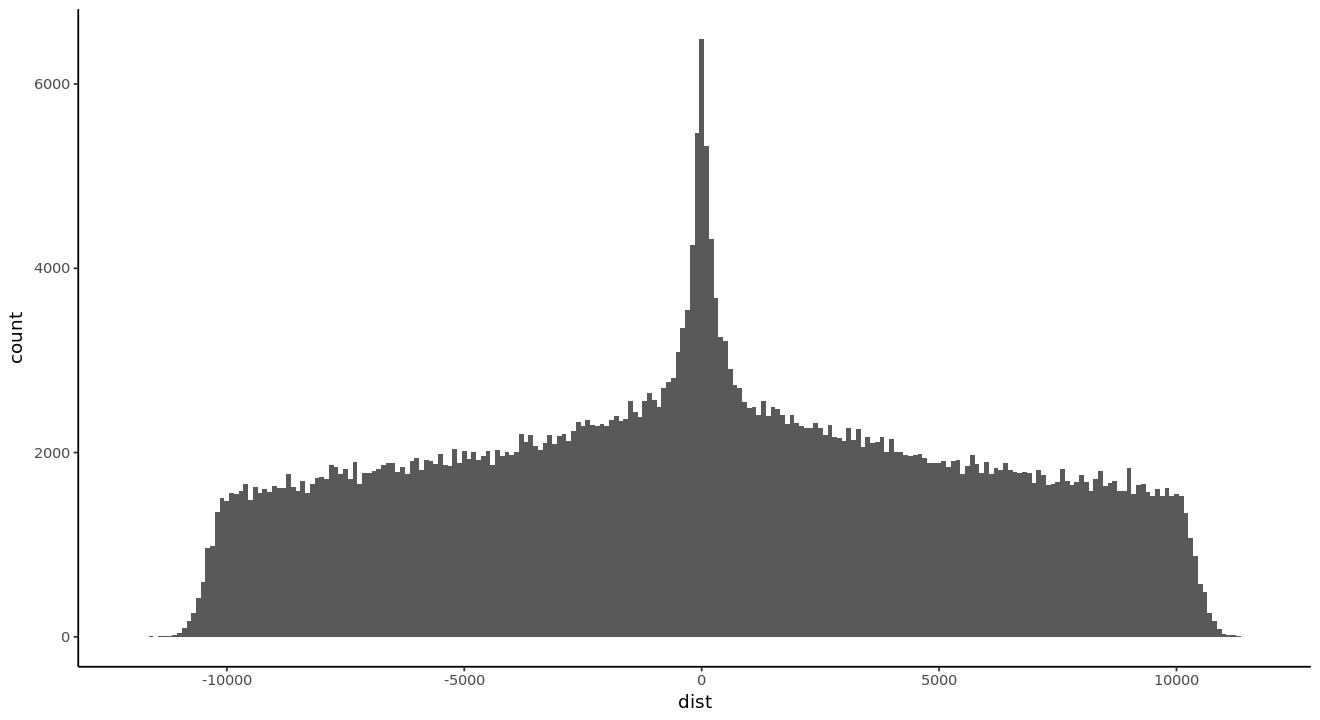

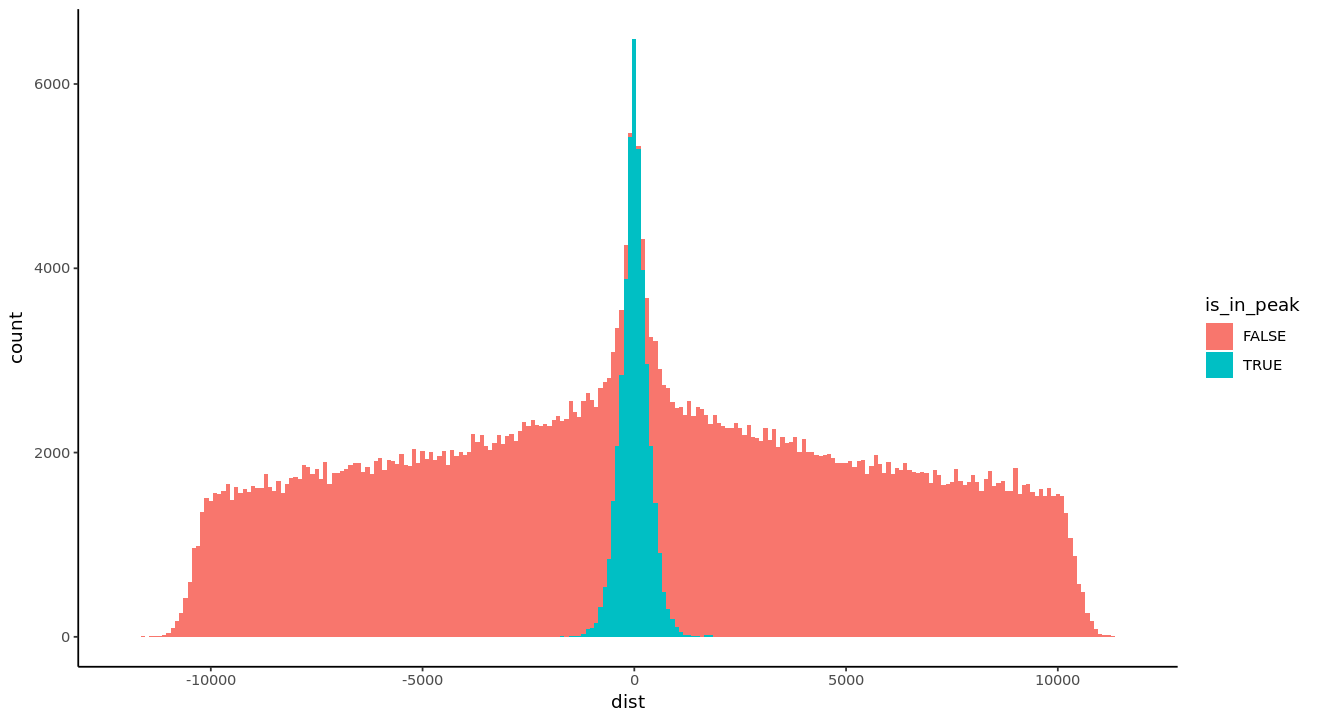

In [209]:
ggplot(sig, aes(x=dist)) + geom_histogram(binwidth=100) + theme_classic()
ggplot(sig, aes(x=dist, fill=is_in_peak)) + geom_histogram(binwidth=100) + theme_classic()

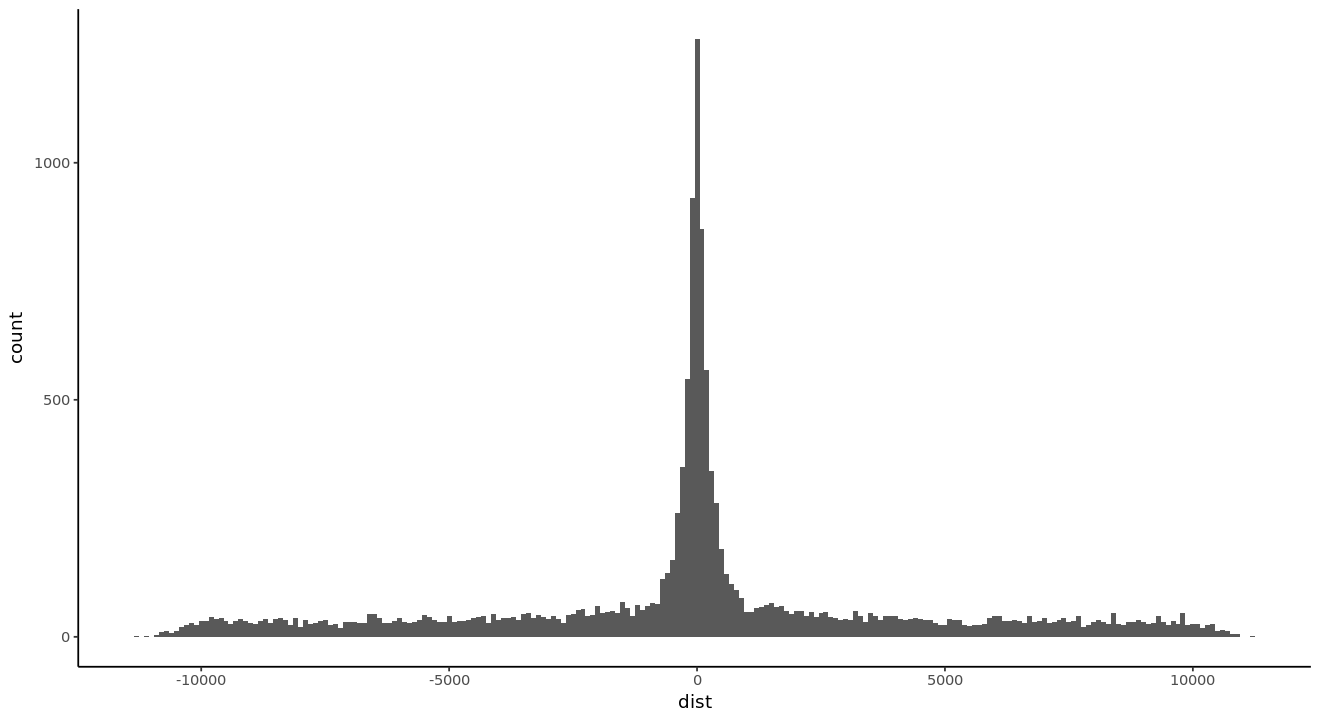

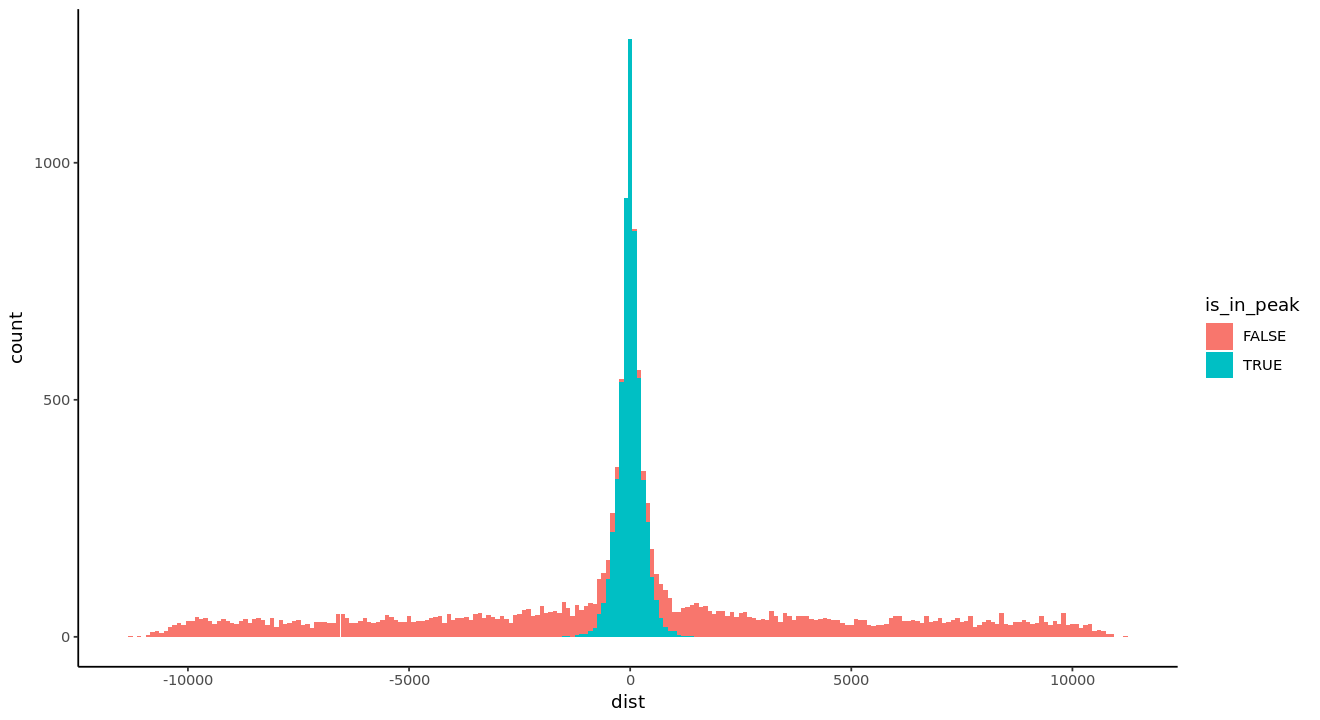

In [210]:
ggplot(sig_leads, aes(x=dist)) + geom_histogram(binwidth=100) + theme_classic()
ggplot(sig_leads, aes(x=dist, fill=is_in_peak)) + geom_histogram(binwidth=100) + theme_classic()

In [222]:
rownames(spec) <- spec$cre
head(spec)

,cre,sig_caqtls_num_cts,sig_caqtls_cts,sig_caqtls_cts_spec,mash_num_cts,mash_cts,mash_cts_spec,peak_num_cts,peak_cts,peak_ct_spec,cpm6_num_cts,cpm6_cts,cpm6_ct_spec,cpm10_num_cts,cpm10_cts,cpm10_ct_spec
,<chr>,<int>,<chr>,<lgl>,<int>,<chr>,<lgl>,<int>,<chr>,<lgl>,<int>,<chr>,<lgl>,<int>,<chr>,<lgl>
chr10:100006062-100006793,chr10:100006062-100006793,2,"beta, bulk",FALSE,NA,NA,NA,4,"alpha, delta, gamma, ductal",FALSE,2,"gamma, ductal",FALSE,NA,NA,NA
chr10:100009188-100010635,chr10:100009188-100010635,NA,NA,NA,NA,NA,NA,6,"beta, alpha, delta, gamma, acinar, ductal",FALSE,6,"beta, alpha, delta, gamma, acinar, ductal",FALSE,6,"beta, alpha, delta, gamma, acinar, ductal",FALSE
chr10:100019905-100021214,chr10:100019905-100021214,NA,NA,NA,NA,NA,NA,3,"alpha, delta, gamma",FALSE,NA,NA,NA,NA,NA,NA
chr10:100037925-100038813,chr10:100037925-100038813,NA,NA,NA,NA,NA,NA,3,"alpha, acinar, ductal",FALSE,NA,NA,NA,NA,NA,NA
chr10:100043372-100044999,chr10:100043372-100044999,NA,NA,NA,NA,NA,NA,3,"gamma, acinar, ductal",FALSE,NA,NA,NA,NA,NA,NA
chr10:100046018-100046622,chr10:100046018-100046622,NA,NA,NA,NA,NA,NA,6,"beta, alpha, delta, gamma, acinar, ductal",FALSE,NA,NA,NA,NA,NA,NA


In [229]:
table(filter(spec, mash_num_cts==1 & mash_cts=='beta')[,c('mash_cts','cpm6_cts')])

        cpm6_cts
mash_cts acinar acinar, ductal alpha alpha, delta alpha, delta, gamma
    beta      6              3     1            1                   2
        cpm6_cts
mash_cts alpha, delta, gamma, acinar beta beta, acinar, ductal beta, alpha
    beta                           1   16                    2           1
        cpm6_cts
mash_cts beta, alpha, delta, acinar, ductal beta, alpha, delta, gamma
    beta                                  1                         9
        cpm6_cts
mash_cts beta, alpha, delta, gamma, acinar
    beta                                 2
        cpm6_cts
mash_cts beta, alpha, delta, gamma, acinar, ductal
    beta                                         9
        cpm6_cts
mash_cts beta, alpha, delta, gamma, ductal beta, alpha, gamma beta, delta
    beta                                 4                  2           3
        cpm6_cts
mash_cts beta, delta, gamma, acinar, ductal beta, delta, gamma, ductal
    beta                                  1 

In [237]:
str_split(filter(spec, mash_num_cts==1 & mash_cts=='beta')$cpm6_cts, ", ", simplify=T)

NA,,,,,
beta,,,,,
acinar,ductal,,,,
beta,alpha,gamma,,,
beta,,,,,
NA,,,,,
beta,delta,,,,
beta,delta,,,,
beta,alpha,delta,gamma,,
acinar,,,,,
acinar,,,,,


In [233]:
nrow(filter(spec, mash_num_cts==1 & mash_cts=='beta')[,c('mash_cts','cpm6_cts')])
sum(is.na(filter(spec, mash_num_cts==1 & mash_cts=='beta')[,c('mash_cts','cpm6_cts')]$cpm6_cts))

[1] 157

[1] 3

In [264]:
head(filter(spec, mash_num_cts==1 & mash_cts=='beta'))

,cre,sig_caqtls_num_cts,sig_caqtls_cts,sig_caqtls_cts_spec,mash_num_cts,mash_cts,mash_cts_spec,peak_num_cts,peak_cts,peak_ct_spec,cpm6_num_cts,cpm6_cts,cpm6_ct_spec,cpm10_num_cts,cpm10_cts,cpm10_ct_spec
,<chr>,<int>,<chr>,<lgl>,<int>,<chr>,<lgl>,<int>,<chr>,<lgl>,<int>,<chr>,<lgl>,<int>,<chr>,<lgl>
chr10:120635775-120636947,chr10:120635775-120636947,2,"beta, bulk",FALSE,1,beta,TRUE,5,"beta, delta, gamma, acinar, ductal",FALSE,NA,NA,NA,NA,NA,NA
chr10:125990587-125992224,chr10:125990587-125992224,2,"beta, bulk",FALSE,1,beta,TRUE,6,"beta, alpha, delta, gamma, acinar, ductal",FALSE,1,beta,TRUE,NA,NA,NA
chr10:14056650-14057465,chr10:14056650-14057465,2,"beta, bulk",FALSE,1,beta,TRUE,3,"beta, acinar, ductal",FALSE,2,"acinar, ductal",FALSE,NA,NA,NA
chr10:3894888-3895899,chr10:3894888-3895899,2,"beta, bulk",FALSE,1,beta,TRUE,6,"beta, alpha, delta, gamma, acinar, ductal",FALSE,3,"beta, alpha, gamma",FALSE,2,"alpha, gamma",FALSE
chr10:4651443-4652570,chr10:4651443-4652570,2,"beta, bulk",FALSE,1,beta,TRUE,6,"beta, alpha, delta, gamma, acinar, ductal",FALSE,1,beta,TRUE,NA,NA,NA
chr10:60905337-60905921,chr10:60905337-60905921,2,"beta, bulk",FALSE,1,beta,TRUE,2,"beta, acinar",FALSE,NA,NA,NA,NA,NA,NA


In [265]:
spec_upset <- data.frame(acinar=as.numeric(str_detect(filter(spec, mash_num_cts==1 & mash_cts=='beta')$cpm6_cts, "acinar")),
           alpha=as.numeric(str_detect(filter(spec, mash_num_cts==1 & mash_cts=='beta')$cpm6_cts, "alpha")),
           beta=as.numeric(str_detect(filter(spec, mash_num_cts==1 & mash_cts=='beta')$cpm6_cts, "beta")),
           delta=as.numeric(str_detect(filter(spec, mash_num_cts==1 & mash_cts=='beta')$cpm6_cts, "delta")),
           ductal=as.numeric(str_detect(filter(spec, mash_num_cts==1 & mash_cts=='beta')$cpm6_cts, "ductal")),
           gamma=as.numeric(str_detect(filter(spec, mash_num_cts==1 & mash_cts=='beta')$cpm6_cts, "gamma")))

rownames(spec_upset) <- rownames(filter(spec, mash_num_cts==1 & mash_cts=='beta'))
dim(spec_upset)
head(spec_upset)

[1] 157   6

,acinar,alpha,beta,delta,ductal,gamma
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr10:120635775-120636947,NA,NA,NA,NA,NA,NA
chr10:125990587-125992224,0,0,1,0,0,0
chr10:14056650-14057465,1,0,0,0,1,0
chr10:3894888-3895899,0,1,1,0,0,1
chr10:4651443-4652570,0,0,1,0,0,0
chr10:60905337-60905921,NA,NA,NA,NA,NA,NA


[1] 157   6

[1] 84

Warning message:
“Removed 6 rows containing missing values or values outside the scale range (`geom_bar()`).”


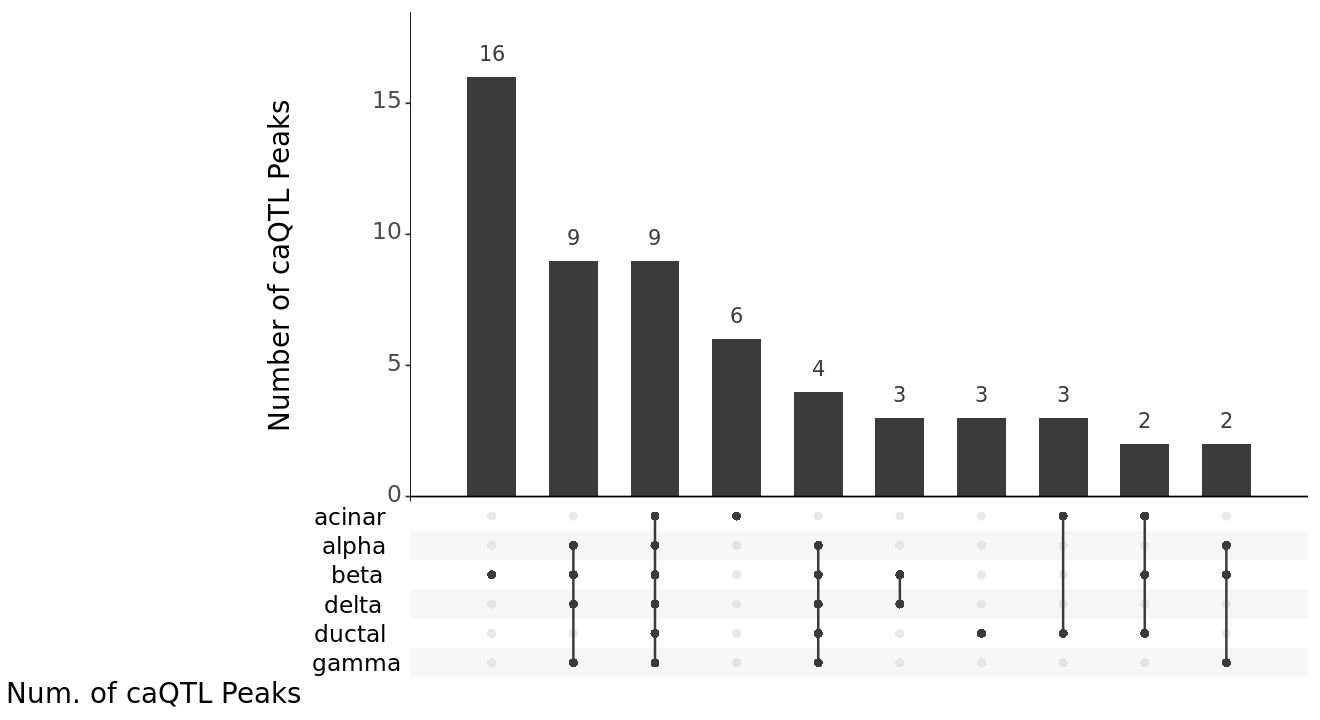

In [260]:
spec_param <- 'cpm6_cts'
#spec_param <- 'cpm10_cts'
#spec_param <- 'peak_cts'

ct <- 'beta'
#ct <- 'alpha'

spec_upset <- data.frame(acinar=as.numeric(str_detect(filter(spec, mash_num_cts==1 & mash_cts==ct)[[spec_param]], "acinar")),
                         alpha =as.numeric(str_detect(filter(spec, mash_num_cts==1 & mash_cts==ct)[[spec_param]], "alpha")),
                         beta  =as.numeric(str_detect(filter(spec, mash_num_cts==1 & mash_cts==ct)[[spec_param]], "beta")),
                         delta =as.numeric(str_detect(filter(spec, mash_num_cts==1 & mash_cts==ct)[[spec_param]], "delta")),
                         ductal=as.numeric(str_detect(filter(spec, mash_num_cts==1 & mash_cts==ct)[[spec_param]], "ductal")),
                         gamma =as.numeric(str_detect(filter(spec, mash_num_cts==1 & mash_cts==ct)[[spec_param]], "gamma")))
dim(spec_upset)
#head(spec_upset)
sum(is.na(filter(spec, mash_num_cts==1 & mash_cts==ct)[,c('mash_cts',spec_param)][[spec_param]]))

options(repr.plot.width=11, repr.plot.height=6)
p1 <- upset(spec_upset, nsets=6, order.by = "freq", nintersects=10, mainbar.y.label="Number of caQTL Peaks", 
      sets.x.label="Num. of caQTL Peaks", text.scale=2)

p1

In [286]:
for (ct in c('acinar','alpha','beta','delta','ductal','gamma')) {
    spec_upset <- data.frame(acinar=as.numeric(str_detect(filter(spec, mash_num_cts==1 & mash_cts==ct)[[spec_param]], "acinar")),
                         alpha =as.numeric(str_detect(filter(spec, mash_num_cts==1 & mash_cts==ct)[[spec_param]], "alpha")),
                         beta  =as.numeric(str_detect(filter(spec, mash_num_cts==1 & mash_cts==ct)[[spec_param]], "beta")),
                         delta =as.numeric(str_detect(filter(spec, mash_num_cts==1 & mash_cts==ct)[[spec_param]], "delta")),
                         ductal=as.numeric(str_detect(filter(spec, mash_num_cts==1 & mash_cts==ct)[[spec_param]], "ductal")),
                         gamma =as.numeric(str_detect(filter(spec, mash_num_cts==1 & mash_cts==ct)[[spec_param]], "gamma")))
    
    print(ct)
    print(nrow(filter(spec_upset, rowSums(spec_upset) == 1 & !!as.symbol(ct)==1)))
    print(nrow(spec_upset))
    print(nrow(filter(spec_upset, rowSums(spec_upset) == 1 & !!as.symbol(ct)==1)) * 100 / nrow(spec_upset))
}


[1] "acinar"
[1] 92
[1] 321
[1] 28.66044
[1] "alpha"
[1] 5
[1] 54
[1] 9.259259
[1] "beta"
[1] 16
[1] 157
[1] 10.19108
[1] "delta"
[1] 0
[1] 0
[1] NaN
[1] "ductal"
[1] 1
[1] 2
[1] 50
[1] "gamma"
[1] 0
[1] 0
[1] NaN
